In [4]:
import numpy as np
import pandas as pd
import mglearn

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


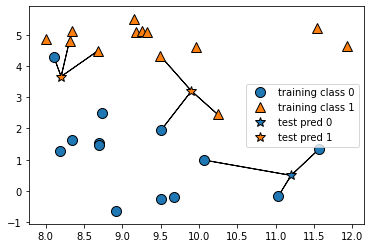

In [95]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [14]:
X, y = mglearn.datasets.make_forge()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.neighbors import KNeighborsClassifier as knnc

In [20]:
model = knnc(n_neighbors=3).fit(x_train, y_train)

In [22]:
model.predict(x_test)

array([1, 0, 1, 0, 1, 0])

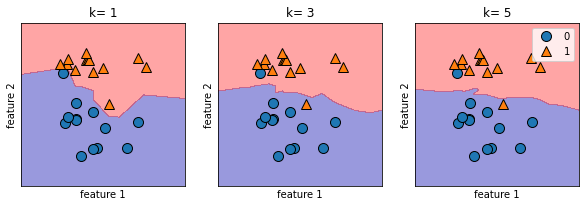

In [87]:
plt.figure(figsize=(10, 3))
for n_neighbors, i in zip([1, 3, 5], [1, 2, 3, 4]):
    plt.subplot(1, 3, i)
    model = knnc(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title(f'k= {n_neighbors}')
plt.legend()
plt.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

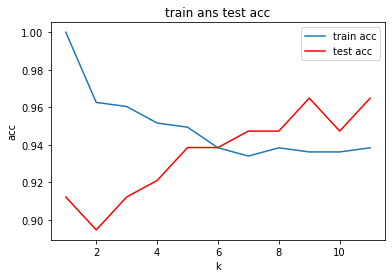

In [114]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()
X, y = pd.DataFrame(df['data'], columns=df['feature_names']), pd.DataFrame(df['target'], columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

train_acc_list, test_acc_list = [], []
for k in range(1, 12):
    model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    train_acc_list.append(model.score(X_train, y_train))
    test_acc_list.append(model.score(X_test, y_test))

plt.plot(range(1, 12), train_acc_list, label='train acc')
plt.plot(range(1, 12), test_acc_list, color='r', label='test acc')
plt.title('train ans test acc')
plt.xlabel('k')
plt.ylabel('acc')
plt.legend()
plt.show()

In [115]:
from sklearn.neighbors import KNeighborsRegressor as knnr

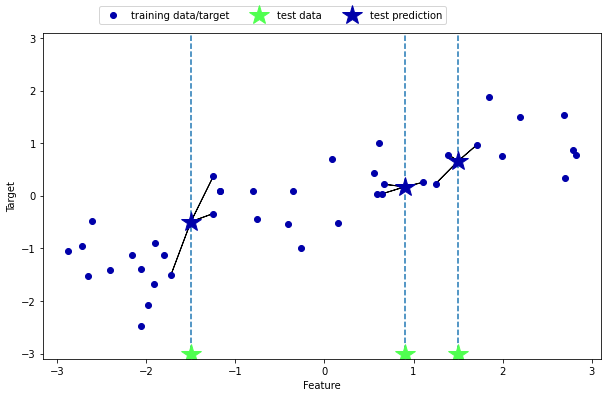

In [118]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

No handles with labels found to put in legend.


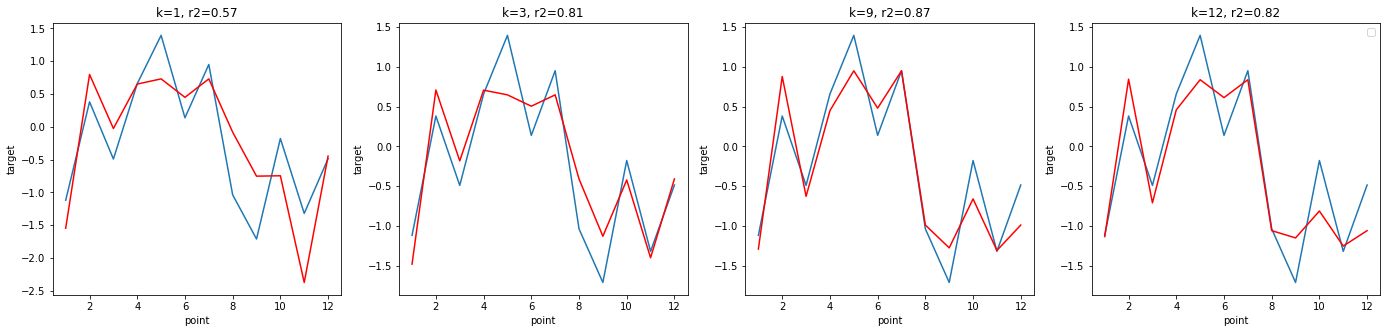

In [169]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

plt.figure(figsize=(30, 5))
K = [1, 3, 9, 12]
train_score, test_score = [], []
for i, k in enumerate(K):
    plt.subplot(1, 5, i + 1)
    model = knnr(n_neighbors=k).fit(X_train, y_train)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))
    plt.plot(range(1, len(X_test) + 1), y_test)
    plt.plot(range(1, len(X_test) + 1), model.predict(X_test), c='r')
    plt.title(f'k={k}, r2={np.round(model.score(X_test, y_test), 2)}')
    plt.xlabel('point')
    plt.ylabel('target')
plt.legend()
plt.show()